Population mean μ: 167.33333333333334
Population std σ: 10.866871163719983
Empirical mean of sample means: 167.1937333333333
Empirical std of sample means: 6.219244584046747
CLT predicted std (σ/√n): 6.273990991622714


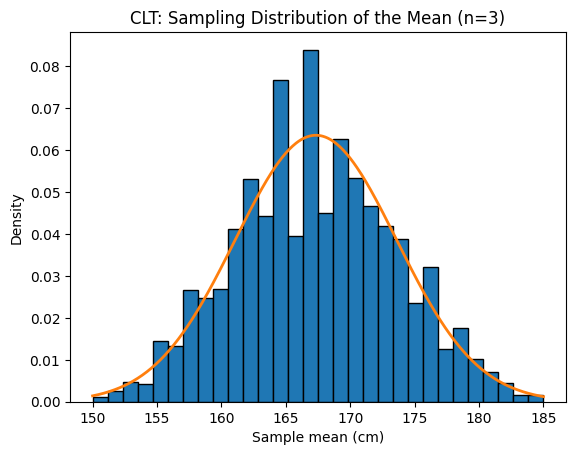

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Small dataset (student heights)
data = np.array([150, 152, 155, 157, 160, 162, 165, 167, 170, 172, 175, 178, 180, 182, 185], dtype=float)

# Step 2: Parameters
n = 3                # sample size
num_samples = 5000   # number of samples
rng = np.random.default_rng(42)

# Step 3: Collect sample means
sample_means = []
for _ in range(num_samples):
    sample = rng.choice(data, size=n, replace=True)  # pick 3 values
    sample_means.append(sample.mean())
sample_means = np.array(sample_means)

# Step 4: Compare empirical stats with CLT prediction
mu = data.mean()
sigma = data.std(ddof=0)
emp_mean = sample_means.mean()
emp_std  = sample_means.std(ddof=1)
clt_se   = sigma / np.sqrt(n)

print("Population mean μ:", mu)
print("Population std σ:", sigma)
print("Empirical mean of sample means:", emp_mean)
print("Empirical std of sample means:", emp_std)
print("CLT predicted std (σ/√n):", clt_se)

# Step 5: Plot histogram + Gaussian curve
plt.hist(sample_means, bins=30, density=True, edgecolor='black')

x = np.linspace(sample_means.min(), sample_means.max(), 400)
pdf = (1/(clt_se*np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mu)/clt_se)**2)
plt.plot(x, pdf, linewidth=2)

plt.title("CLT: Sampling Distribution of the Mean (n=3)")
plt.xlabel("Sample mean (cm)")
plt.ylabel("Density")
plt.show()